In [ ]:
from sympy import *
from sympy.physics.mechanics import *
init_vprinting()

In [ ]:
# Create symbolic variables
m, k, g, t = symbols('m k g t')
x = dynamicsymbols('x')
x_dot = diff(x, t)
x_ddot = diff(x_dot, t)

# Create Lagrangian
T = 0.5*m*x_dot**2
V = -m*x*g + 0.5*k*x**2
L = T - V
L

In [ ]:
# Create Euler-Lagrange Equation
diff_x_dot = diff(L, x_dot)
eqn = diff(diff_x_dot, t) - diff(L, x)

# Solution
sol = solve(eqn, x_ddot)[0]
Eq(x_ddot, sol)

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

In [ ]:
# Assign constants numerical values and set inital conditions
g = 9.81
k = 40
m = 1
b = 0.25
x0 = 0
x_dot0 = 0

# y[0] = x, y[1] = x_dot; the way IVP works is that it will integrate to those values
def spring_mass_ODE(t, y):
    return(y[1], g-k*y[0]/m)

def spring_mass_friction_ODE(t,y):
    return(y[1], g-k*y[0]/m - b*y[1]/m)

sol = solve_ivp(spring_mass_friction_ODE, [0,5], (x0,x_dot0), t_eval=np.linspace(0,5,5*30))

x, x_dot = sol.y
t = sol.t

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
plt.plot(t,x,'r', lw=2, label=r'$x$')
plt.plot(t,x_dot,'b',lw=2,label=r'$\dot x$')
plt.title(f'Spring Mass System. k/m={k/m}, g={g}')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$x$,(m), $\dot x$ (m/s)')
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots()

x_curve, = ax.plot(t[0],x[0],'r')
x_dot_curve, = ax.plot(t[0],x_dot[0],'b')

ax.set_title(f'Spring Mass System. k/m={k/m}, g={g}')
ax.set_xlim(0,5)
ax.set_ylim(-2,2)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$x$,(m), $\dot x$ (m/s)')
ax.legend([r'$x$ (m), $\dot x$ (m/s)'])
ax.grid()

def animate(i):
    # for each frame_i, update the data stored on each artist
    x_curve.set_xdata(t[:i+1])
    x_curve.set_ydata(x[:i+1])
    x_dot_curve.set_xdata(t[:i+1])
    x_dot_curve.set_ydata(x_dot[:i+1])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('time_domain_friction.mp4', writer=ffmpeg_writer)

array([[ 0.        , -0.01666667,  0.01666667, -0.01666667,  0.01666667,
        -0.01666667,  0.01666667, -0.01666667,  0.01666667, -0.01666667,
         0.01666667, -0.01666667,  0.01666667, -0.01666667,  0.01666667,
        -0.01666667,  0.01666667, -0.01666667,  0.01666667, -0.01666667,
         0.01666667, -0.01666667,  0.01666667, -0.01666667,  0.01666667,
        -0.01666667,  0.01666667, -0.01666667,  0.01666667, -0.01666667,
         0.01666667,  0.        ],
       [ 0.        , -0.01666667, -0.05      , -0.08333333, -0.11666667,
        -0.15      , -0.18333333, -0.21666667, -0.25      , -0.28333333,
        -0.31666667, -0.35      , -0.38333333, -0.41666667, -0.45      ,
        -0.48333333, -0.51666667, -0.55      , -0.58333333, -0.61666667,
        -0.65      , -0.68333333, -0.71666667, -0.75      , -0.78333333,
        -0.81666667, -0.85      , -0.88333333, -0.91666667, -0.95      ,
        -0.98333333, -1.        ]])

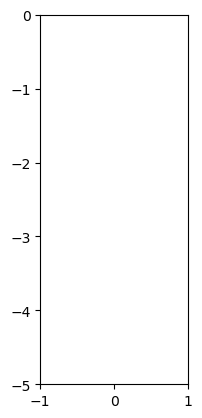

In [4]:
# Affine transformations provide a means to translate/scale/shear/rotate/reflect a group of points at once, by etending 2D vector into 3D with a constant value for z
from matplotlib.transforms import Affine2D
import matplotlib.gridspec as gridspec

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1,1)
ax.set_ylim(-5,0)

def generate_spring(n):
    """
    Creates a spring with "n" interior points, starting at (0,0) and ending at (0,-1)
    Spring will have a width of 2/(2n)
    """
    data = np.zeros((2,n+2))
    data[:,-1] = [0,-1]
    for i in range(1,n+1):
        data[0,i] = -1/(2*n) if i%2 else 1/(2*n)
        data[1,i] = -(2*i-1)/(2*n)
    return data

#put the (x,y) cords of the spring into a  matrix
data = np.append(generate_spring(30), np.ones((1,30+2)), axis=0)
data[0:2]

In [ ]:
# Evaluate the solution to 30fps
g = 9.81
k = 40
m = 1
b = 0.25

x0 = -1
x_dot0 = 0

t_final = 10
fps = 30

def spring_mass_ODE(t, y):
    return (y[1], g-k*y[0]/m - b*y[1]/m)

sol = solve_ivp(spring_mass_ODE, [0, t_final], (x0, x_dot0),
                t_eval=np.linspace(0,t_final,t_final*fps+1))

x, x_dot = sol.y
t = sol.t

ell = 2
y0 = -(ell + x0)
spring = plt.Line2D(data[0,:], data[1,:], color='r')
circle = ax.add_patch(plt.Circle((0,y0),0.25,fc='b',zorder=3))
ax.add_line(spring)

def animate(i):
    y = -(ell+x[i])
    circle.set_center((0,y))

    stretch_factor = -y

    A = Affine2D().scale(8/stretch_factor, stretch_factor).get_matrix()
    data_new = A@data

    xn = data_new[0,:]
    yn = data_new[1,:]

    spring.set_data(xn,yn)

    x_curve.set_data(t[:i+1],x[:i+1])
    x_dot_curve.set_data(t[:i+1],x_dot[:i+1])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('spring_mass_affine.gif', writer=ffmpeg_writer)

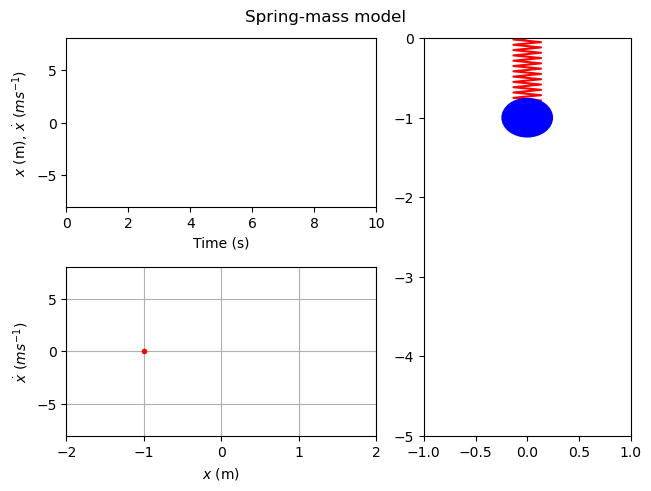

In [ ]:
# Evaluate the solution to 30fps
g = 9.81
k = 40
m = 1
b = 0.25

x0 = -1
x_dot0 = 0

t_final = 10
fps = 30

def spring_mass_ODE(t, y):
    return (y[1], g-k*y[0]/m - b*y[1]/m)

sol = solve_ivp(spring_mass_ODE, [0, t_final], (x0, x_dot0),
                t_eval=np.linspace(0,t_final,t_final*fps+1))

x, x_dot = sol.y
t = sol.t

ell = 2
y0 = -(ell + x0)

fig = plt.figure(layout="constrained")
gs = gridspec.GridSpec(4,5, figure=fig)
fig.suptitle('Spring-mass model')

ax1 = fig.add_subplot(gs[0:2,0:3])
ax2 = fig.add_subplot(gs[2:4,0:3])
ax3 = fig.add_subplot(gs[0:4,3:6])


x_curve, = ax1.plot(t[0], x[0], 'r')
x_dot_curve, = ax1.plot(t[0], x_dot[0],'b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel(r"$x$ (m), $\dot x$ ($ms^{-1}$)")
ax1.set_xlim(0,10)
ax1.set_ylim(-8,8)
ax1.grid()

phase_curve, = ax2.plot(x[0], x_dot[0], 'b')
phase_dot, = ax2.plot(x[0],x_dot[0], 'r.')
ax2.set_xlabel(r"$x$ (m)")
ax2.set_ylabel(r"$\dot x$ ($ms^{-1}$)")
ax2.set_xlim(-2,2)
ax2.set_ylim(-8,8)
ax2.grid()

spring = plt.Line2D(data[0,:], data[1,:], color='r')
mass = ax3.add_patch(plt.Circle((0,y0),0.25,fc='b',zorder=3))
ax3.add_line(spring)
ax3.set_xlim(-1,1)
ax3.set_ylim(-5,0)

def animate(i):
    y = -(ell+x[i])
    mass.set_center((0,y))

    stretch_factor = -y

    A = Affine2D().scale(8/stretch_factor, stretch_factor).get_matrix()
    data_new = A@data

    xn = data_new[0,:]
    yn = data_new[1,:]

    spring.set_data(xn,yn)

    x_curve.set_data(t[:i+1],x[:i+1])
    x_dot_curve.set_data(t[:i+1],x_dot[:i+1])
    phase_curve.set_data(x[:i+1],x_dot[:i+1])
    phase_dot.set_data((x[i],), (x_dot[i],))
    """
    If you want to assign something that normally returns multiple values ie. list of lists
    and you only want to assign it to 1 variaable then utilise `var, = func()` notation.
    For example, the way to animate a dot on a curve, using `.set_data()` is by grouping the
    x coord as (val, ) and the same for y. This is because `.set_data()` expects a sequence.
    """

ani = animation.FuncAnimation(fig, animate,len(t))
ffmpeg_writer = animation.FFMpegWriter(fps)
ani.save("Holistic view.mp4", ffmpeg_writer)